# PROJECT 1 - Epidemic, Pandemic & Endemic (COVID-19) impacts on Socioeconomics

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
import json

## -------------------------------------------------------------------------------------------------

## Demographics - Defining the  Canadian Population & Socioeconomic Composition
##### Section completed by: Michelle Carvalho

In [2]:
# Using Canadian Census data from 2016 & 2021, define criteria and parameter for comparison/correlatio
from stats_can import StatsCan
sc = StatsCan()

#### Household Income Statistics by Household Type

In [3]:
# Pull data from Stats-Can: Canada Census website
stats_df = sc.table_to_df("98-10-0057-01")

In [4]:
# Print data set
stats_df.head()

,REF_DATE,GEO,DGUID,Household size (7),Household type including census family structure (11),Coordinate,Household income statistics (6):Number of households (2021)[1],Symbol,Household income statistics (6):Number of households (2016)[2],Symbol.1,Household income statistics (6):Median household total income (2020) (2020 constant dollars)[3],Symbol.2,Household income statistics (6):Median household total income (2015) (2020 constant dollars)[4],Symbol.3,Household income statistics (6):Median household after-tax income (2020) (2020 constant dollars)[5],Symbol.4,Household income statistics (6):Median household after-tax income (2015) (2020 constant dollars)[6],Symbol.5
0,2021-01-01,Canada,2021A000011124,Total - Households by household size,Total – Household type including census family...,1.1.1,14978940,NaN,14072075,NaN,84000,NaN,76000,NaN,73000,NaN,66500,NaN
1,2021-01-01,Canada,2021A000011124,Total - Households by household size,Census-family households,1.1.2,9919095,NaN,9519940,NaN,107000,NaN,98000,NaN,93000,NaN,84000,NaN
2,2021-01-01,Canada,2021A000011124,Total - Households by household size,Households consisting of only one census famil...,1.1.3,8932695,NaN,8605750,NaN,104000,NaN,95000,NaN,90000,NaN,82000,NaN
3,2021-01-01,Canada,2021A000011124,Total - Households by household size,"One couple, with or without children in their ...",1.1.4,7627195,NaN,7355560,NaN,111000,NaN,103000,NaN,96000,NaN,88000,NaN
4,2021-01-01,Canada,2021A000011124,Total - Households by household size,Without children,1.1.5,3837400,NaN,3627180,NaN,91000,NaN,86000,NaN,79500,NaN,74000,NaN


In [5]:
# Remove unecessary and blank columns
stats_df = stats_df.drop(["REF_DATE",
                          "GEO", 
                          "DGUID",
                          "Coordinate",
                          "Symbol", 
                          "Symbol.1", 
                          "Symbol.2", 
                          "Symbol.3", 
                          "Symbol.4", 
                          "Symbol.5"],
                          axis = 1)


# Clean column headers to remove unnecessary descriptors
stats_df = stats_df.rename({"Household size (7)":"Household size",
                            "Household type including census family structure  (11)":"Household type including census family structure",
                            "Household income statistics (6):Number of households (2021)[1]": "Household income statistics:Number of households(2021)",
                            "Household income statistics (6):Number of households (2016)[2]": "Household income statistics:Number of households(2016)",
                            "Household income statistics (6):Median household total income (2020) (2020 constant dollars)[3]": "Household income statistics:Median household total income(2020)",
                            "Household income statistics (6):Median household total income (2015) (2020 constant dollars)[4]": "Household income statistics:Median household total income(2015)",      
                            "Household income statistics (6):Median household after-tax income (2020) (2020 constant dollars)[5]": "Household income statistics:Median household after-tax income(2020)",
                            "Household income statistics (6):Median household after-tax income (2015) (2020 constant dollars)[6]": "Household income statistics:Median household after-tax income(2015)"}
                            , axis=1)
# stats_df.head()

In [6]:
# Drop rows with null data
stats_clean = stats_df.dropna()

# Print clean DataFrame
stats_clean.head()

,Household size,Household type including census family structure,Household income statistics:Number of households(2021),Household income statistics:Number of households(2016),Household income statistics:Median household total income(2020),Household income statistics:Median household total income(2015),Household income statistics:Median household after-tax income(2020),Household income statistics:Median household after-tax income(2015)
0,Total - Households by household size,Total – Household type including census family...,14978940,14072075,84000,76000,73000,66500
1,Total - Households by household size,Census-family households,9919095,9519940,107000,98000,93000,84000
2,Total - Households by household size,Households consisting of only one census famil...,8932695,8605750,104000,95000,90000,82000
3,Total - Households by household size,"One couple, with or without children in their ...",7627195,7355560,111000,103000,96000,88000
4,Total - Households by household size,Without children,3837400,3627180,91000,86000,79500,74000


In [7]:
stats_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237673 entries, 0 to 420958
Data columns (total 8 columns):
 #   Column                                                               Non-Null Count   Dtype 
---  ------                                                               --------------   ----- 
 0   Household size                                                       237673 non-null  object
 1   Household type including census family structure                     237673 non-null  object
 2   Household income statistics:Number of households(2021)               237673 non-null  object
 3   Household income statistics:Number of households(2016)               237673 non-null  object
 4   Household income statistics:Median household total income(2020)      237673 non-null  object
 5   Household income statistics:Median household total income(2015)      237673 non-null  object
 6   Household income statistics:Median household after-tax income(2020)  237673 non-null  object
 7   Hou

In [8]:
# Format column data as numeric values (will allow for additional formatting and presentation)
stats_clean = stats_clean.astype({"Household income statistics:Number of households(2021)":"int",
                            "Household income statistics:Number of households(2016)":"int",
                            "Household income statistics:Median household total income(2020)":"int",
                            "Household income statistics:Median household total income(2015)":"int",      
                            "Household income statistics:Median household after-tax income(2020)":"int",
                            "Household income statistics:Median household after-tax income(2015)":"int"})

In [9]:
# Format columns for currency
stats_clean["Household income statistics:Number of households(2021)"]=stats_clean["Household income statistics:Number of households(2021)"].map("${:,.2f}".format)
stats_clean["Household income statistics:Number of households(2016)"]=stats_clean["Household income statistics:Number of households(2016)"].map("${:,.2f}".format)
stats_clean["Household income statistics:Median household total income(2020)"]=stats_clean["Household income statistics:Median household total income(2020)"].map("${:,.2f}".format)
stats_clean["Household income statistics:Median household total income(2015)"]=stats_clean["Household income statistics:Median household total income(2015)"].map("${:,.2f}".format)
stats_clean["Household income statistics:Median household after-tax income(2020)"]=stats_clean["Household income statistics:Median household after-tax income(2020)"].map("${:,.2f}".format)
stats_clean["Household income statistics:Median household after-tax income(2015)"]=stats_clean["Household income statistics:Median household after-tax income(2015)"].map("${:,.2f}".format)

#print DataFrame
stats_clean.head(11)

,Household size,Household type including census family structure,Household income statistics:Number of households(2021),Household income statistics:Number of households(2016),Household income statistics:Median household total income(2020),Household income statistics:Median household total income(2015),Household income statistics:Median household after-tax income(2020),Household income statistics:Median household after-tax income(2015)
0,Total - Households by household size,Total – Household type including census family...,"$14,978,940.00","$14,072,075.00","$84,000.00","$76,000.00","$73,000.00","$66,500.00"
1,Total - Households by household size,Census-family households,"$9,919,095.00","$9,519,940.00","$107,000.00","$98,000.00","$93,000.00","$84,000.00"
2,Total - Households by household size,Households consisting of only one census famil...,"$8,932,695.00","$8,605,750.00","$104,000.00","$95,000.00","$90,000.00","$82,000.00"
3,Total - Households by household size,"One couple, with or without children in their ...","$7,627,195.00","$7,355,560.00","$111,000.00","$103,000.00","$96,000.00","$88,000.00"
4,Total - Households by household size,Without children,"$3,837,400.00","$3,627,180.00","$91,000.00","$86,000.00","$79,500.00","$74,000.00"
5,Total - Households by household size,With children,"$3,789,795.00","$3,728,380.00","$134,000.00","$122,000.00","$114,000.00","$103,000.00"
6,Total - Households by household size,One one-parent census family,"$1,305,500.00","$1,250,190.00","$68,000.00","$56,400.00","$62,000.00","$52,000.00"
7,Total - Households by household size,With a parent that is a man+,"$282,845.00","$265,385.00","$78,000.00","$71,000.00","$68,000.00","$61,200.00"
8,Total - Households by household size,With a parent that is a woman+,"$1,022,655.00","$984,800.00","$65,500.00","$53,600.00","$60,800.00","$50,000.00"
9,Total - Households by household size,Other census family households,"$986,400.00","$914,195.00","$140,000.00","$120,000.00","$125,000.00","$107,000.00"


/var/folders/qk/h0rtvttx7pq7gh9m9g6zmlkry_033b/T/ipykernel_33211/3791912914.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


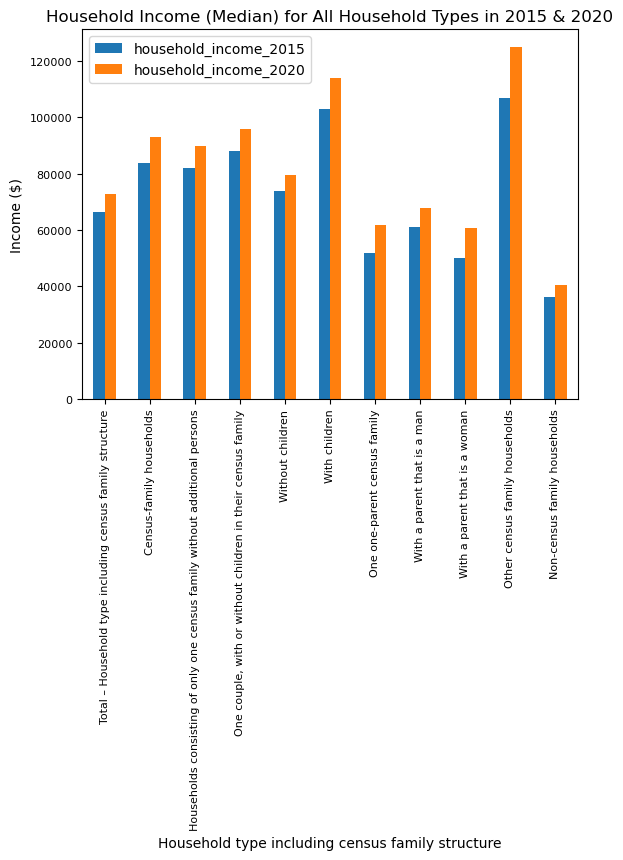

<Figure size 640x480 with 0 Axes>

In [10]:
#Plot the results
plotdata = pd.DataFrame({
    "household_income_2015":[66500, 
                             84000,
                             82000,
                             88000,
                             74000,
                             103000,
                             52000,
                             61200,
                             50000,
                             107000,
                             36400],
    "household_income_2020":[73000,
                             93000,
                             90000,
                             96000,
                             79500,
                             114000,
                             62000,
                             68000,
                             60800,
                             125000,
                             40400]
    }, 
    index=["Total – Household type including census family structure", 
           "Census-family households",
           "Households consisting of only one census family without additional persons",
           "One couple, with or without children in their census family",
           "Without children",
           "With children",
           "One one-parent census family",
           "With a parent that is a man",
           "With a parent that is a woman",
           "Other census family households",
           "Non-census family households"]
)
plotdata.plot(kind="bar", fontsize=8)
plt.title("Household Income (Median) for All Household Types in 2015 & 2020")
plt.xlabel("Household type including census family structure")
plt.ylabel("Income ($)")
plt.tight_layout()
plt.show()

# Save the Plot
plt.savefig('household_income.png')

In [32]:
household_median_2015 = plotdata["household_income_2015"].median()
f"The median after tax household income for 2015 is: ${household_median_2015:,.2f}"

'The median after tax household income for 2015 is: $74,000.00'

In [33]:
household_median_2020 = plotdata["household_income_2020"].median()
f"The median after tax household income for 2020 is: ${household_median_2020:,.2f}"

'The median after tax household income for 2020 is: $79,500.00'

#### The Impact of the COVID-19 Pandemic on Income by Percentage Change in Income Between 2019 and 2020

In [34]:
# Pull data from Stats-Can: Canada Census website
covid_df = sc.table_to_df("98-10-0087-01")

In [35]:
covid_df.head()

,REF_DATE,GEO,DGUID,Change in income between 2019 and 2020 (15),Gender (3),Age (8A),Selected income sources with COVID-19 benefits in 2019 and 2020 (23),Coordinate,Income statistics (8):Total - Population aged 15 years and over with an amount - 100% data[1],Symbol,...,Income statistics (8):Total - Population aged 15 years and over with an amount - 25% sample data[4],Symbol.3,Income statistics (8):Percentage with an amount (%) - 25% sample data[5],Symbol.4,Income statistics (8):Average amount ($)[6],Symbol.5,Income statistics (8):Aggregate amount ($'000)[7],Symbol.6,Income statistics (8):As a share of total income (%)[8],Symbol.7
0,2021-01-01,Canada,2021A000011124,Total - Population aged 15 years and over,Total - Gender,Total - Age,Total income in 2020,1.1.1.1.1,29241815,NaN,...,29242930,NaN,96.4,NaN,54450,NaN,1592000000,NaN,100.0,NaN
1,2021-01-01,Canada,2021A000011124,Total - Population aged 15 years and over,Total - Gender,Total - Age,Total income in 2019,1.1.1.1.2,28598395,NaN,...,28599665,NaN,94.3,NaN,52350,NaN,1496000000,NaN,100.0,NaN
2,2021-01-01,Canada,2021A000011124,Total - Population aged 15 years and over,Total - Gender,Total - Age,Market income in 2020,1.1.1.1.3,26045500,NaN,...,26047020,NaN,85.9,NaN,50240,NaN,1308000000,NaN,82.2,NaN
3,2021-01-01,Canada,2021A000011124,Total - Population aged 15 years and over,Total - Gender,Total - Age,Market income in 2019,1.1.1.1.4,25708465,NaN,...,25709145,NaN,84.7,NaN,51040,NaN,1312000000,NaN,87.6,NaN
4,2021-01-01,Canada,2021A000011124,Total - Population aged 15 years and over,Total - Gender,Total - Age,Employment income in 2020,1.1.1.1.5,21127615,NaN,...,21127690,NaN,69.6,NaN,50280,NaN,1062000000,NaN,66.8,NaN


In [36]:
# Remove unecessary and blank columns
covid_df = covid_df.drop(["REF_DATE",
                          "GEO", 
                          "DGUID",
                          "Gender (3)",
                          "Age (8A)",
                          "Coordinate",
                          "Symbol",
                          "Income statistics (8):Total - Population aged 15 years and over with an amount - 25% sample data[4]",
                          "Symbol.1", 
                          "Symbol.2", 
                          "Symbol.3",
                          "Income statistics (8):Percentage with an amount (%) - 25% sample data[5]",
                          "Symbol.4", 
                          "Symbol.5",
                          "Symbol.6",
                          "Symbol.7"],
                          axis = 1)


# Clean column headers to remove unnecessary descriptors
covid_df = covid_df.rename({"Change in income between 2019 and 2020 (15)":"Change in income between 2019 and 2020",
                            "Selected income sources with COVID-19 benefits in 2019 and 2020 (23)": "Selected income sources with COVID-19 benefits in 2019 and 2020",
                            "Income statistics (8):Total - Population aged 15 years and over with an amount  - 100% data[1]": "Income statistics:Total - Population aged 15 years and over with an amount",
                            "Income statistics (8):Percentage with an amount (%) - 100% data[2]": "Income statistics:Percentage with an amount (%)",
                            "Income statistics (8):Median amount ($)[3]": "Income statistics:Median amount ($)",
                            "Income statistics (8):Average amount ($)[6]": "Income statistics:Average amount($)",
                            "Income statistics (8):Aggregate amount ($'000)[7]": "Income statistics:Aggregate amount ($'000)",
                            "Income statistics (8):As a share of total income (%)[8]": "Income statistics:As a share of total income (%)"}
                            , axis=1)
# covid_df.head()

In [37]:
# Drop rows with null data
covid_clean = covid_df.dropna()

# Print clean DataFrame
covid_clean.head()

,Change in income between 2019 and 2020,Selected income sources with COVID-19 benefits in 2019 and 2020,Income statistics:Total - Population aged 15 years and over with an amount,Income statistics:Percentage with an amount (%),Income statistics:Median amount ($),Income statistics:Average amount($),Income statistics:Aggregate amount ($'000),Income statistics:As a share of total income (%)
0,Total - Population aged 15 years and over,Total income in 2020,29241815,96.4,41200,54450,1592000000,100.0
1,Total - Population aged 15 years and over,Total income in 2019,28598395,94.3,39200,52350,1496000000,100.0
2,Total - Population aged 15 years and over,Market income in 2020,26045500,85.9,35200,50240,1308000000,82.2
3,Total - Population aged 15 years and over,Market income in 2019,25708465,84.7,36800,51040,1312000000,87.6
4,Total - Population aged 15 years and over,Employment income in 2020,21127615,69.6,37200,50280,1062000000,66.8


In [38]:
covid_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419146 entries, 0 to 2541957
Data columns (total 8 columns):
 #   Column                                                                      Dtype 
---  ------                                                                      ----- 
 0   Change in income between 2019 and 2020                                      object
 1   Selected income sources with COVID-19 benefits in 2019 and 2020             object
 2   Income statistics:Total - Population aged 15 years and over with an amount  object
 3   Income statistics:Percentage with an amount (%)                             object
 4   Income statistics:Median amount ($)                                         object
 5   Income statistics:Average amount($)                                         object
 6   Income statistics:Aggregate amount ($'000)                                  object
 7   Income statistics:As a share of total income (%)                            object
dtypes: 

In [39]:
# Format column data as integer
covid_clean = covid_clean.astype({"Income statistics:Total - Population aged 15 years and over with an amount": "float",
                                  "Income statistics:Percentage with an amount (%)": "float",
                                  "Income statistics:Median amount ($)": "float",
                                  "Income statistics:Average amount($)": "float",
                                  "Income statistics:Aggregate amount ($'000)": "float",
                                  "Income statistics:As a share of total income (%)": "float"})

In [40]:
# Format columns for currency
covid_clean["Income statistics:Total - Population aged 15 years and over with an amount"]=covid_clean["Income statistics:Total - Population aged 15 years and over with an amount"].map("${:,.2f}".format)
covid_clean["Income statistics:Percentage with an amount (%)"]=covid_clean["Income statistics:Percentage with an amount (%)"].map("{:,.2f}%".format)
covid_clean["Income statistics:Median amount ($)"]=covid_clean["Income statistics:Median amount ($)"].map("${:,.2f}".format)
covid_clean["Income statistics:Average amount($)"]=covid_clean["Income statistics:Average amount($)"].map("${:,.2f}".format)
covid_clean["Income statistics:Aggregate amount ($'000)"]=covid_clean["Income statistics:Aggregate amount ($'000)"].map("${:,.2f}".format)
covid_clean["Income statistics:As a share of total income (%)"]=covid_clean["Income statistics:As a share of total income (%)"].map("{:,.2f}%".format)

#print DataFrame
covid_clean.head()

,Change in income between 2019 and 2020,Selected income sources with COVID-19 benefits in 2019 and 2020,Income statistics:Total - Population aged 15 years and over with an amount,Income statistics:Percentage with an amount (%),Income statistics:Median amount ($),Income statistics:Average amount($),Income statistics:Aggregate amount ($'000),Income statistics:As a share of total income (%)
0,Total - Population aged 15 years and over,Total income in 2020,"$29,241,815.00",96.40%,"$41,200.00","$54,450.00","$1,592,000,000.00",100.00%
1,Total - Population aged 15 years and over,Total income in 2019,"$28,598,395.00",94.30%,"$39,200.00","$52,350.00","$1,496,000,000.00",100.00%
2,Total - Population aged 15 years and over,Market income in 2020,"$26,045,500.00",85.90%,"$35,200.00","$50,240.00","$1,308,000,000.00",82.20%
3,Total - Population aged 15 years and over,Market income in 2019,"$25,708,465.00",84.70%,"$36,800.00","$51,040.00","$1,312,000,000.00",87.60%
4,Total - Population aged 15 years and over,Employment income in 2020,"$21,127,615.00",69.60%,"$37,200.00","$50,280.00","$1,062,000,000.00",66.80%


In [52]:
# File to load for vizualizations
income_sources_data = "input_files/income_sources.csv"

# Read Data File and store into Pandas DataFrames
income_sources = pd.read_csv(income_sources_data)

# Print the data for verification
income_sources

,Income statistics,Median amount ($) 2019,Median amount ($) 2020,Income statistics:Percentage with an amount 2019 (%),Income statistics:Percentage with an amount 2020 (%)
0,After-tax income,35200,36800,94.3,96.4
1,Earning replacement benefits,5720,8700,8.0,31.2
2,Employment income,38000,37200,70.0,69.6
3,Employment Insurance (EI) benefits,5720,5720,8.0,10.5
4,Government transfers,4240,9800,76.5,83.7
5,Income taxes,6900,6550,67.1,71.3
6,Market income,36800,35200,84.7,85.9
7,Net self-employment income,6120,4480,9.9,10.7
8,Other government benefits,2820,8900,74.8,83.2
9,Total income,39200,41200,94.3,96.4


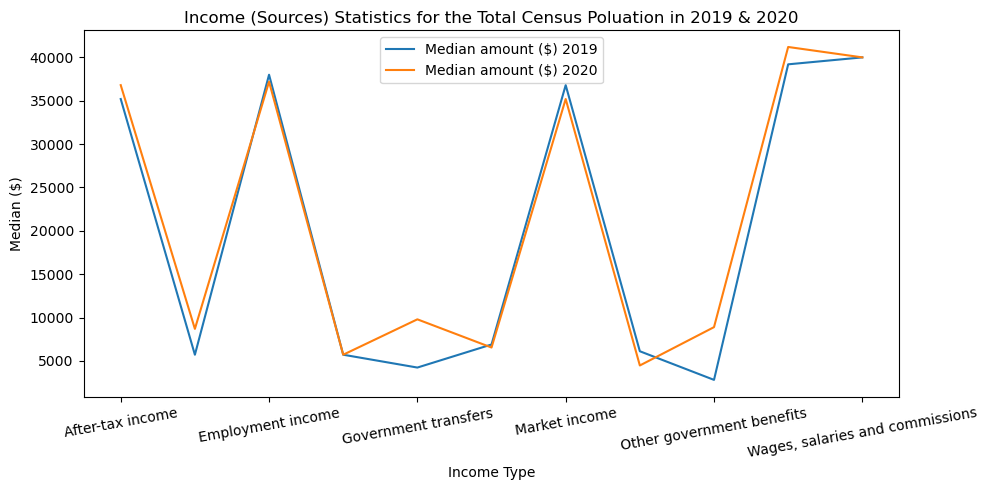

<Figure size 640x480 with 0 Axes>

In [53]:
# Generate line plot
income_sources.plot(x="Income statistics", y=["Median amount ($) 2019", "Median amount ($) 2020"], rot=10, figsize=(10,5))

# Add labels to the x and y axes
plt.title("Income (Sources) Statistics for the Total Census Poluation in 2019 & 2020")
plt.xlabel("Income Type")
plt.ylabel("Median ($)")
plt.tight_layout()
plt.show()

# Save the plot and display it
plt.savefig('income_sources.png')

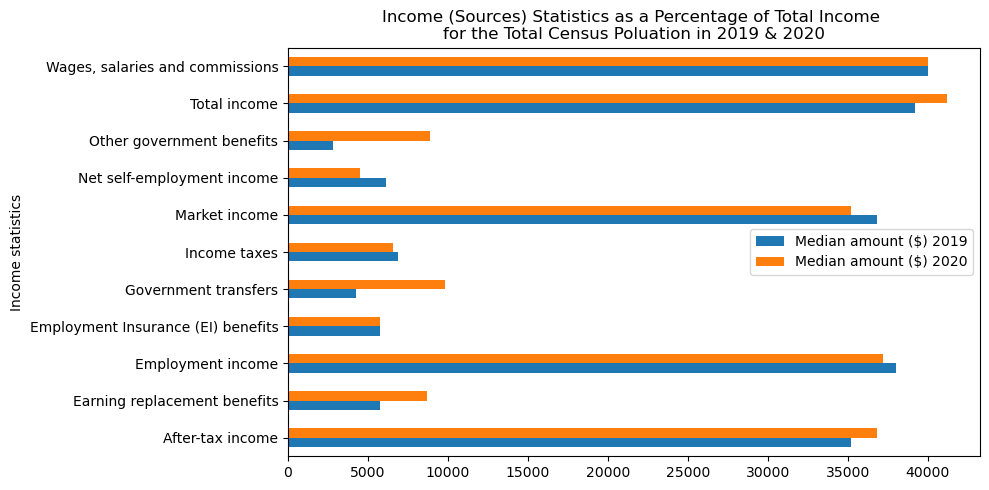

<Figure size 640x480 with 0 Axes>

In [54]:
# Generate line plot
income_sources.plot.barh(x="Income statistics", y=["Median amount ($) 2019", "Median amount ($) 2020"], figsize=(10,5), legend=True)

# Add labels to the x and y axes
plt.title("Income (Sources) Statistics as a Percentage of Total Income \nfor the Total Census Poluation in 2019 & 2020")
# plt.xlabel(" ")
# plt.ylabel(" ")
plt.tight_layout()
plt.show()

# Save the plot and display it
plt.savefig('income_percentages.png')

## -------------------------------------------------------------------------------------------------